# Part 3: Cancer

In this part of the assignment, you will build a predictive model to classify a given breast tumor as cancer or not based on exam measurements of the size and shape of the tumor. 

**Learning objectives.** You will:
1. Train and test a logistic regression model for binary classification. 
2. Evaluate and interpret a range of metrics including the confusion matrix, precision, recall, and ROC curve.
3. Look for evidence of overfitting and perform hyperparameter selection to choose a regularization weight on a validation set to mitigate overfitting.
4. Fit and discuss an interpretable shallow decision tree model.

The following code will download all of the data, print the feature names, and preview one example. The target value is binary: either `1` or `0` depending on whether the tumor is malignant or benign.

The code stores the feature matrix `X` as a two-dimensional NumPy array where each row corresponds to a data point and each column is a feature. The target value is stored as a one-dimensional NumPy array `y` where the index `i` element of `y` correpsonds to the row `i` data point of `X`.

Your overall goal in this part is to build and evaluate a logistic model to predict the target variable `y` as a function of the ten features in `X` by predicting the probability that a given tumor is malignant.

In [23]:
# Run but DO NOT MODIFY this code

from sklearn.datasets import load_breast_cancer

# Load the diabetes dataset
cancer = load_breast_cancer()
print(cancer.feature_names)

# Get the feature data and target variable
X = cancer.data
y = cancer.target

# Preview the first data point
print(X[0])
print(y[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


## Task 1

Randomly split the input data into a [train and test partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with at least 30% of the data reserved for testing. Use a random seed of `2024` for reproducibility of the results. 

In [24]:
# Write code for task 1 here

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

## Task 2

Build and evaluate a baseline model as follows. Calculate the proportion of the training data with target `1`, call this proportion `p`. For each example in the test data, randomly predict `1` with probability `p` and `0` otherwise. Set a random seed of `2024` before starting for reproducibility.

Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. Also compute and report the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of the predictions on the test data. 

Briefly interpret the confusion matrix, precision, and recall. What do these quantities mean in the context of the predictive task?

Precision: 0.5614
Recall: 0.6154


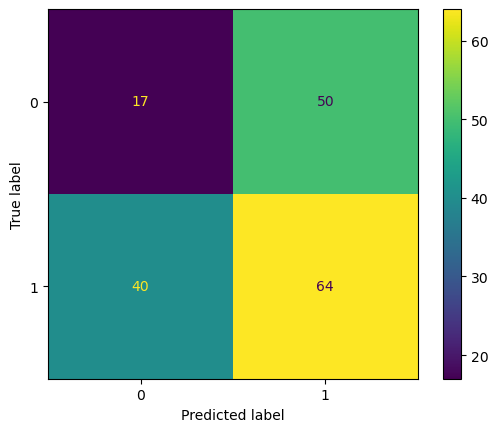

In [25]:
# Write code for task 2 here

# calculate p
import numpy as np
p = np.mean(y_train)

# predict 1 with probability p and 0 otherwise
np.random.seed(2024)
y_pred = np.random.choice([0, 1], size=len(y_test), p=[1 - p, p])

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


*Briefly interpret for task 2 here*

This confusion matrix, precision, and recall tell us that the model is not effective at detecting cancer. The precision score tell us that nearly half of the models positive predcitions are incorrect, and the recall score tells us that many positive cases are going undetected in the model. Furthermore, based on the matrix we can see that 40 out of the 57 predicted negative tests ended up being positive. Thus, with a subject as high stakes as cancer detection, a simple baseline model does not suffice.

## Task 3

Randomly split the *training* data into a *train* and *validation* set; similar to how you [randomly split the original dataset](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with 30% of the training data (equals 70% times 30% = 21% of the overall data) reserved for the validation set. Use a random seed of `2024` for reproducibility of the results.

Build a [logistic regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) on the train set with the parameter setting `penalty = 'None'` (this will train a basic model without applying any regularization). 

Evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of your model on both (a) the train set, and (b) the validation set. Report your results and briefly explain whether you find evidence of *overfitting*, along with a brief description of what that means. 

If you do find evidence of overfitting, retrain the model (potentially multiple times) to reduce the overfitting by changing the `penalty` parameter to `l2` (this is the default) and trying different values of the `C` hyperparameter that controls the strength of regularization. Show your work and explain in English how you decided on a good setting of the hyperparameter `C` controlling the degree of regularization. 

You should conclude this task by reporting a final model that achieves comparable accuracy on the train set as the unregularized model and that mitigates any evidence of overfitting (it may not be possible to achieve a validation error that is no greater than the train error, but you should reduce the gap).

In [66]:
# Write code for task 3 here
from sklearn.linear_model import LogisticRegression

X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=2024)

log_reg = LogisticRegression(penalty = "l2", C = 1000, max_iter=10000).fit(X_train_new, y_train_new)

train_accuracy = log_reg.score(X_train_new, y_train_new)
val_accuracy = log_reg.score(X_validation, y_validation)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Training Accuracy: 0.9856
Validation Accuracy: 0.9667


*Briefly explain your findings and process for task 3 here*

In the unregularized logistic regression model, my model recorded a Training Accuracy of 1.0000 and Validation Accuracy of 0.9417, which shows overfitting. The model is teaching itself to perfectly fit the data which is not often realistic. While the 0.9417 accuracy score is fairly good, it can be improved by regularization to decrease the gap between training accuracy and validation accuracy. After changing penalty and trying many C values, I found C = 1000 to be the best belance of training and validation accuracy. This c value allowed flexibility in the model while still preventing extreme overfitting.

## Task 4

For the final model you trained in task 3, compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of the resulting predictions on the test data. Also compute and report the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of the predictions on the test data. 

Based on your results, briefly describe how the resulting model is an improvement over the baseline from task 2, interpreting the reported metrics in the context of the predictive task.

Precision: 0.9703
Recall: 0.9423


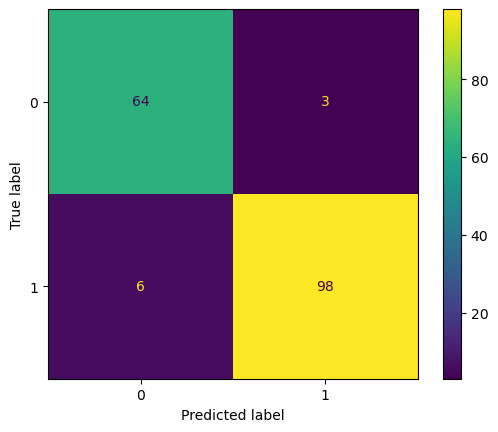

In [68]:
# Write code for task 4 here

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score

y_test_pred = log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

*Briefly interpret for task 4 here*

This model is vast improvement from task 2, as precsion increased from 0.5614 to 0.9703 and recall increased from 0.6154 to 0.9423. These scores represent the number of false positives decreasing from 50 to 3 and the number of false negatives decreasing from 40 to 6. In terms of cancer, false negatives can have major consequences, so this model should be trusted much more. 

## Task 5

For the predictions of your final model trained in task 3, compute and visualize the [Receiver Operator Characteristic (ROC) Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#roccurvedisplay). Note that you need to use the *probability predictions* of the model, *not* the absolute 0/1 predictions, in order to correctly plot the ROC curve.

Briefly interpret the ROC curve. In particular, what change(s) in the model account for the different possible false positive rates and true positive rates represented on the curve? In the context of a cancer detection task, why might one prefer to select a point on the curve other than the default (represented by your previous results in task 4)?

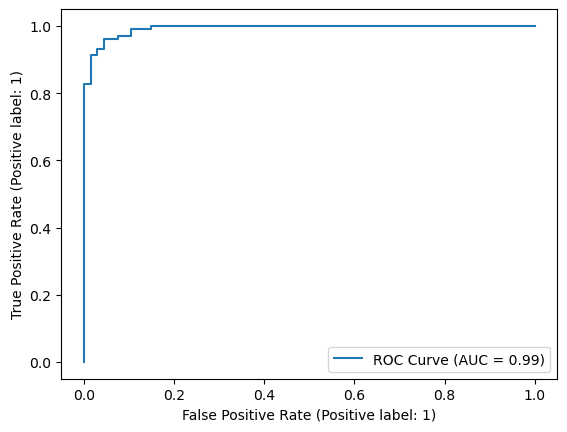

In [78]:
# Write code for task 5 here

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

prob_pred = log_reg.predict_proba(X_test)[:, 1]

roc_display = RocCurveDisplay.from_predictions(y_test, prob_pred, name="ROC Curve")


*Briefly interpret for task 5 here*

My AUC value of 0.99 is almost exactly 1.0, meaning that the model is very accurate at predicting cancer cases. The changes that resulted in  the different possible false positive rates and true positive rates come from the switch from a random baseline model to a trained logistic regression model that seperates malignant and benign tumors. 

Some people may choose a point other than the default on the ROC curve in this scenario because in cancer detection the consequences of a false negative far surpass the consequences of a false positive. By lowering the decision boundary threshold below 0.5, the model is able to reduce false negatives by predicting more malignant cases.

## Task 6

In practice, it can be very helpful to understand **why** a predictive model made a particular prediction. *Interpretable* models have the property that a human can understand this aspect. One example of an interpretable model is the *decision tree*, especially a *shallow* decision tree.

Build three [decision tree classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), one for each setting of the `max_depth` hyperparameter to `3`, `5`, and `7`. Fit each model on the train set from task 3, and evaluate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) of each model on the validation set (also from task 3). 

Report all of these validation measures for each model corresponding to different settings of `max_depth`, and select one as your final model. Briefly explain why you would select that model for this task. Compute and visualize the [confusion matrix](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#create-confusionmatrixdisplay) of your final decision tree model.

Model 1 (Depth 3) - Accuracy: 0.9417, Precision: 0.9221, Recall: 0.9861
Model 2 (Depth 5) - Accuracy: 0.9083, Precision: 0.9296, Recall: 0.9167
Model 3 (Depth 7) - Accuracy: 0.9167, Precision: 0.9306, Recall: 0.9306


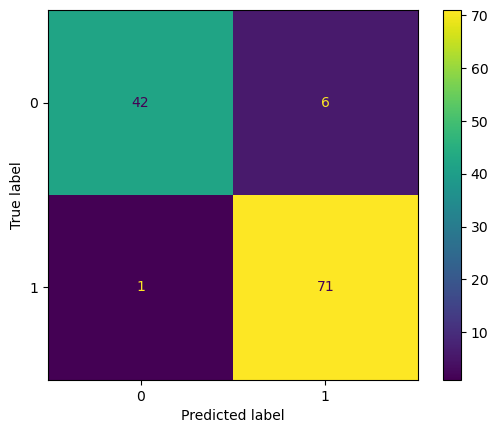

In [85]:
# Write code for task 6 here
from sklearn.tree import DecisionTreeClassifier

tree_model_1 = DecisionTreeClassifier(max_depth=3, random_state=2024)
tree_model_1.fit(X_train_new, y_train_new)
y_val_pred_1 = tree_model_1.predict(X_validation)
accuracy_1 = accuracy_score(y_validation, y_val_pred_1)
precision_1 = precision_score(y_validation, y_val_pred_1)
recall_1 = recall_score(y_validation, y_val_pred_1)

tree_model_2 = DecisionTreeClassifier(max_depth=5, random_state=2024)
tree_model_2.fit(X_train_new, y_train_new)
y_val_pred_2 = tree_model_2.predict(X_validation)
accuracy_2 = accuracy_score(y_validation, y_val_pred_2)
precision_2 = precision_score(y_validation, y_val_pred_2)
recall_2 = recall_score(y_validation, y_val_pred_2)

tree_model_3 = DecisionTreeClassifier(max_depth=7, random_state=2024)
tree_model_3.fit(X_train_new, y_train_new)
y_val_pred_3 = tree_model_3.predict(X_validation)
accuracy_3 = accuracy_score(y_validation, y_val_pred_3)
precision_3 = precision_score(y_validation, y_val_pred_3)
recall_3 = recall_score(y_validation, y_val_pred_3)
                                    
print(f"Model 1 (Depth 3) - Accuracy: {accuracy_1:.4f}, Precision: {precision_1:.4f}, Recall: {recall_1:.4f}")
print(f"Model 2 (Depth 5) - Accuracy: {accuracy_2:.4f}, Precision: {precision_2:.4f}, Recall: {recall_2:.4f}")
print(f"Model 3 (Depth 7) - Accuracy: {accuracy_3:.4f}, Precision: {precision_3:.4f}, Recall: {recall_3:.4f}")

final_tree_model = tree_model_1
y_val_pred_final = tree_model_1.predict(X_validation)

cm_final = confusion_matrix(y_validation, y_val_pred_final)
cm_display = ConfusionMatrixDisplay(cm_final).plot()


*Explain for task 6 here*

I made tree models for every max depth (3, 5, and 7), and after analyzing the accuracy, precision, and recall of each model, I chose depth 3 because recall is the most important statistic for cancer detection. Since all of the models had very similar precision, it was an easy choose to pick depth three with the highest recall and accuracy. My decision matrix shows that there is only one false negative in the final model with max depth 3. 